<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [14]:
yelp.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [4]:
yelp.head(1)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w


In [5]:
STOPWORDS = set(STOPWORDS)#.union(set(['and', 'if', 'for']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [8]:
def gather_data(column_name): 
    tokens = []
    for text in yelp[column_name]:
        tokens.append(tokenize(text))
    return tokens

In [9]:
tokens = gather_data('text')

In [12]:
#taking a look at the 1st review's 1st 10 tokens:
tokens[0][0:10]

['beware',
 'fake',
 'fake',
 'fake',
 'small',
 'business',
 'los',
 'alamitos',
 'ca',
 'received']

In [18]:
yelp.shape

(10000, 9)

In [19]:
yelp['stars'].value_counts()

5    4462
4    2185
1    1496
3    1098
2     759
Name: stars, dtype: int64

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [20]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
yelp['tokens'] = tokens
yelp['tokens_joined'] = yelp['tokens'].apply(lambda x: ' '.join(x))

In [38]:
pd.set_option("display.max_colwidth", 0)
yelp.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens,tokens_joined
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a small business in Los Alamitos, CA and received what looked like a legitimate bill for $70 with an account number and all. I called the phone number listed (866) 273-7934. The wait time on hold said 20 minutes and to leave a message. I could not get a live person on the phone no matter what number I selected. I left a very FIRM message that I would be contacting the BBB and my attorney regarding their company trying to scam businesses. This has to be illegal!!!!!",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, los, alamitos, ca, received, looked, like, legitimate, account, number, called, phone, number, listed, wait, time, hold, said, minutes, leave, message, live, person, phone, matter, number, selected, left, firm, message, contacting, bbb, attorney, company, trying, scam, businesses, illegal]",beware fake fake fake small business los alamitos ca received looked like legitimate account number called phone number listed wait time hold said minutes leave message live person phone matter number selected left firm message contacting bbb attorney company trying scam businesses illegal
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. Staff was friendly. No complaints here. Sweet tea is good. Parking can be a pain sometimes.,0,5CgjjDAic2-FAvCtiHpytA,"[came, lunch, togo, service, quick, staff, friendly, complaints, sweet, tea, good, parking, pain]",came lunch togo service quick staff friendly complaints sweet tea good parking pain


In [32]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english',
                         #tokenizer = tokenize,
                         ngram_range = (1,2),
                         min_df = 0.01, 
                         max_df = 0.9,
                         max_features = 5000
                       )

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(yelp.tokens_joined)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(10000, 815)


,able,absolutely,actually,add,added,affordable,afternoon,ago,ahead,air,...,wow,wrong,year,years,years ago,yelp,yes,young,yum,yummy
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.125895,0.0,0.0,0.0,0.0,0.158684,0.0,0.0
3,0.0,0.0,0.245353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [31]:
#Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
#Given the size of the dataset, it will probably be best to use a NearestNeighbors model for this.



In [33]:
#to visualize
doc_len = [len(doc) for doc in yelp.tokens]

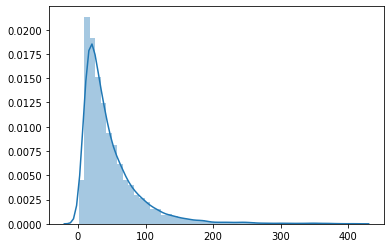

In [34]:
import seaborn as sns
sns.distplot(doc_len); #this shows that most reviews are around 30 words

In [45]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM, change n_neighbors for 10 reviews
nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [46]:
# make array for a fake review that I write
review = ["The show was absolutely amazing! I enjoyed every bit of the experience. I would love to bring my classmates to watch it with me next time! I'm giving it 10 out of 10"]

In [47]:
#similarity of my fake review to reviews in the dataset
new = tfidf.transform(review)

In [49]:
# get the 10 reviews most similar
nn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.        , 1.        , 1.12342103,
         1.13703934, 1.16800622, 1.17056064, 1.19354988, 1.20259684]]),
 array([[6311, 9889, 6204,  469, 9613, 2815, 3898, 6916, 9557,  736]]))

In [52]:
print(yelp.text[6311])

天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來


In [67]:
#print all 10 most similar reviews
print(yelp.iloc[[6311, 9889, 6204,  469, 9613, 2815, 3898, 6916, 9557,  736]].text)

6311    天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來                                                                                                                                                                                                                                                                                    
9889    Bon massage.  Spa propre organisé manque juste le stationnement prix abordable en promotion personnels respectueux                                                                                                                                                                                                                                                               
6204    旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。\n質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 \nネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。\n予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。\nまた是非マッサージなどで伺いたいと思います。                  

In [48]:
#I am confused by the Chinese, French, and Japanse, and the gibberish for the first 4 reviews. 
#The next few have in common a rave review similar to the one that I wrote in the fake review.
#Going to test another review after I finish the next sections

In [116]:
review2 = ["this restaurant is gay and amazing the food is just fabulous and very great tasting"]

In [117]:
new2 = tfidf.transform(review2)

In [118]:
# get the 10 reviews most similar
nn.kneighbors(new2.todense())

(array([[0.95514268, 1.        , 1.        , 1.        , 1.        ,
         1.05963321, 1.087124  , 1.09656871, 1.12313374, 1.12314429]]),
 array([[3994,  469, 6204, 6311, 9889, 8677, 2999, 6519, 9825, 8739]]))

In [119]:
#print all 10 most similar reviews
print(yelp.iloc[[3994,  469, 6204, 6311, 9889, 8677, 2999, 6519, 9825, 8739]].text)

3994    Amazing and possibly by new fav restaurant in Toronto.  Killer views and exquisite food and service.  Modern, clean, and delicious.  The highlight was the reserved maple syrup tasting!!  Thank you!                                                                                                                                                                                                                                                                                                                              
469     O  o  thenk 6nnn  .b  cgv  xx TV cvg  9 nvehxcfvvv3c nb b  c  y4  nb and the vghvhridd h 0d  c       v   3,  vv  4  ruddy                                                                                                                                                                                                                                                                                                                                                           

In [120]:
#F(&$%^($EJR)) I don't understand why I'm getting so many languages in this. Note to self: strip other language next time and most importantly:
#get a better model! :)

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(yelp, test_size=0.2, random_state=42)

In [74]:
train.shape

(8000, 11)

In [73]:
test.shape

(2000, 11)

In [69]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

pipe = Pipeline([
    ('vect', vect), 
    ('rfc', rfc)
])

In [79]:

parameters = {
    'vect__max_df': (0.6, 0.9),
    'vect__min_df': (.02, .05),
    'vect__max_features': (5000, None),
    'rfc__n_estimators': (100, 250),
    'rfc__max_depth': (None)
}

parameters = {
    'rfc__max_depth': (None, 10),
    'rfc__n_estimators': (500, 750),
    'vect__max_df': (0.5, 0.9),
    'vect__max_features': (1000, 5000),
    'vect__min_df': (0.01, None)
}

grid_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=4, verbose=1)
grid_search.fit(train['tokens_joined'], train['stars'])

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [80]:
grid_search.best_params_

{'rfc__max_depth': None,
 'rfc__n_estimators': 750,
 'vect__max_df': 0.5,
 'vect__max_features': 1000,
 'vect__min_df': 0.01}

In [81]:
grid_search.best_score_

0.5873753308968411

In [82]:
# Prediction on review sample
pred = grid_search.predict(review)

In [84]:
pred

array([5])

In [85]:
#So it's predicting a 5 star rating

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [91]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [86]:
#Stretch Goal: Use a generator
def doc_stream():
    for t in tokens:
        yield t

In [87]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(doc_stream())

In [88]:
len(id2word.keys())

26474

In [89]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

In [90]:
len(id2word.keys())

7493

In [101]:
#bag of words
corpus = [id2word.doc2bow(text) for text in doc_stream()]

In [93]:
corpus[345][:10]

[(35, 1),
 (38, 1),
 (45, 1),
 (47, 1),
 (111, 1),
 (196, 1),
 (384, 1),
 (704, 1),
 (705, 1),
 (771, 1)]

In [94]:
lda = LdaMulticore(corpus = corpus,
                   id2word = id2word,
                   random_state = 42,
                   num_topics = 15,
                   passes = 10,
                   workers = 4)

In [95]:
lda.print_topics()

[(0,
  '0.012*"room" + 0.011*"service" + 0.011*"food" + 0.010*"time" + 0.010*"got" + 0.008*"minutes" + 0.007*"like" + 0.007*"place" + 0.007*"table" + 0.006*"came"'),
 (1,
  '0.021*"place" + 0.019*"food" + 0.014*"good" + 0.011*"breakfast" + 0.011*"great" + 0.008*"like" + 0.008*"coffee" + 0.007*"service" + 0.007*"time" + 0.006*"nice"'),
 (2,
  '0.010*"car" + 0.009*"time" + 0.008*"good" + 0.006*"dr" + 0.006*"day" + 0.006*"great" + 0.005*"come" + 0.005*"service" + 0.005*"pool" + 0.005*"got"'),
 (3,
  '0.018*"great" + 0.014*"food" + 0.014*"place" + 0.013*"good" + 0.011*"best" + 0.008*"like" + 0.008*"try" + 0.008*"ramen" + 0.007*"menu" + 0.007*"ordered"'),
 (4,
  '0.015*"good" + 0.009*"place" + 0.009*"cream" + 0.008*"ice" + 0.008*"ordered" + 0.008*"time" + 0.007*"like" + 0.007*"got" + 0.007*"food" + 0.006*"pretty"'),
 (5,
  '0.016*"place" + 0.014*"service" + 0.013*"great" + 0.013*"food" + 0.011*"store" + 0.008*"like" + 0.008*"good" + 0.007*"tea" + 0.006*"ve" + 0.006*"love"'),
 (6,
  '0.015*"

In [96]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [110]:
topics = [' '.join(t[0:2]) for t in words]

In [111]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
room service

------ Topic 1 ------
place food

------ Topic 2 ------
car time

------ Topic 3 ------
great food

------ Topic 4 ------
good place

------ Topic 5 ------
place service

------ Topic 6 ------
great hair

------ Topic 7 ------
pizza like

------ Topic 8 ------
place good

------ Topic 9 ------
great food

------ Topic 10 ------
said service

------ Topic 11 ------
time great

------ Topic 12 ------
food good

------ Topic 13 ------
place good

------ Topic 14 ------
chicken good



In [99]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [100]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.059348 -0.083306  1       1        13.670839
12    -0.141703  0.008293  2       1        11.389734
10     0.204841 -0.088457  3       1        8.044128 
4     -0.095361 -0.061307  4       1        8.017599 
2      0.186369 -0.001862  5       1        6.821069 
1     -0.038330  0.008003  6       1        6.818658 
13    -0.112420 -0.024771  7       1        6.364404 
11     0.121313  0.040197  8       1        6.186783 
6      0.124484  0.074830  9       1        5.542592 
9     -0.022778  0.155433  10      1        5.110945 
7     -0.060003 -0.065943  11      1        5.077615 
14    -0.123124 -0.025083  12      1        4.704563 
8     -0.061853  0.022047  13      1        4.389216 
3     -0.064272  0.012030  14      1        4.036094 
5      0.023488  0.029895  15      1        3.825755 , topic_info=          Term         Freq        Total Category  logprob  loglift
138   food      4926.000000  4926.000000  Default  30.0000  30.0000
1132  chicken   1365.000000  1365.000000  Default  29.0000  29.0000
196   great     4228.000000  4228.000000  Default  28.0000  28.0000
127   place     4642.000000  4642.000000  Default  27.0000  27.0000
374   pizza     747.000000   747.000000   Default  26.0000  26.0000
...     ...            ...          ...       ...      ...      ...
418   customer  56.990345    827.242432   Topic15 -5.7030   0.5882 
508   work      56.585953    941.834534   Topic15 -5.7102   0.4513 
183   amazing   59.665600    1372.229980  Topic15 -5.6572   0.1280 
72    got       62.043392    2106.374268  Topic15 -5.6181  -0.2615 
116   best      57.537388    1829.274414  Topic15 -5.6935  -0.1958 

[1271 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
181   1      0.043513  absolutely
181   2      0.004835  absolutely
181   3      0.067687  absolutely
181   4      0.060435  absolutely
181   5      0.024174  absolutely
...  ..           ...         ...
4606  7      0.042303  yell      
5319  13     0.875986  yelped    
6578  6      0.841350  zen       
5790  15     0.813709  zip       
6327  12     0.969137  était     

[4731 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 13, 11, 5, 3, 2, 14, 12, 7, 10, 8, 15, 9, 4, 6])

In [1]:
# Part 4: Topic Modeling
# Let's find out what those yelp reviews are saying! :D

# Estimate a LDA topic model of the review text
# Keep the iterations parameter at or below 5 to reduce run time
# The workers parameter should match the number of physical cores on your machine.
# Create 1-2 visualizations of the results
# You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract.
# In markdown, write 1-2 paragraphs of analysis on the results of your topic model
# Note: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Analysis:

For topic 1, the bubble is large which means that it shares a large amount of common terms with the other topics
top terms in topic 1 are (when scale is at 0.5): room, minutes, table, hotel, got, reservation. The red is the estimated frequency of 
term 'room' in topic 1 which is about 70%, whereas the term appears 1000 times in the corpus
When placing the slider all the way to the left on topic 1, it shows the words that are absolutely unique to this topic, in this case they are:
aid,suite, financial, gay, accomodations (for top 5 most unique words). If clicking on the word, it shows gay to be only associated with topic 1
When placing the slider to the right that means what are the words that are most common to the other topics that appear in topic 1, i.e., room
service, food, time

In [112]:
#Stretch Goal: other entities
yelp['business_id'].value_counts()

4JNXUYY8wbaaDmk3BPzlWw    15
K7lWdNUhCbcnEvI0NhGewg    12
RESDUcs7fIiihp38-d6_6g    10
yfxDa8RFOvJPQh0rNtakHA    10
El4FC8jcawUVgw_0EIcbaQ    10
                          ..
PeSIVXbiZCWZAbdr397NbQ    1 
cWPTOM_o5toaXpq0gNxD7Q    1 
4SBY4CHiMD8YOCEU9_fdnw    1 
TXyzdWoKj8bzKr-dBR7HKQ    1 
hDyc9DdjGldhxis5E1rd3w    1 
Name: business_id, Length: 8297, dtype: int64

In [113]:
yelp['user_id'].value_counts()

CxDOIDnH8gp9KXzpBHJYXw    11
U4INQZOPSUaj8hMjLlZ3KA    9 
ic-tyi1jElL_umxZVh8KNA    5 
ffPY_bHX8vLebHu8LBEqfg    4 
bxBR0vakC_OAU-5rCYCDsw    4 
                         .. 
R_Dp411RxOMuSngCLfwHIQ    1 
SXHNkZfxbRnKIWKroqB5Hw    1 
vRfedFG7c1Z2e8x9Jabm4Q    1 
n9fNWJpWvOLyuAxgMHL9JQ    1 
0D5WAgaOM1M00t3KIEf_Fw    1 
Name: user_id, Length: 9667, dtype: int64

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)